## Linear Algebra for AI and ML

### Assignment 2

### Question 9

### Shrinivas Khiste: 19CS30043

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generating random vectors X

In [ ]:
X = np.random.randn(500,2)
X.shape

(500, 2)

### Generating y

In [ ]:
Y = []
for x in X:
  if(x[0]*x[1]>=0):
    Y.append(1)
  else:
    Y.append(-1)
Y = np.array(Y)

In [ ]:
Y.shape

(500,)

### Generating A matrix
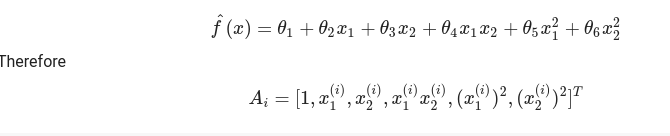



In [ ]:
A = np.array([np.ones(500), X[:,0], X[:,1] , X[:,0]*X[:,1], X[:,0]**2 ,X[:,1]**2 ])
A = np.transpose(A)
A.shape

(500, 6)

### Solving System of Linear Equations

In [ ]:
def solve(A,b):
  a_plus = np.linalg.inv(np.dot(np.transpose(A), A))
  x_hat = np.dot(a_plus,np.dot(np.transpose(A),b))
  return x_hat

In [ ]:
theta_hat = solve(A,Y)

In [ ]:
theta_hat.shape

(6,)

In [ ]:
theta_hat

array([ 0.04645604, -0.02592527,  0.00946176,  0.72366631, -0.03461467,
        0.03991082])

### The Prediction

In [ ]:
y_hat = np.dot(A,theta_hat)

In [ ]:
y_hat.shape

(500,)

In [ ]:
y_tilde = [1 if i>0 else -1 for i in y_hat]

In [ ]:
len(y_tilde)

500

### Confusion Matrix

In [ ]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0

In [ ]:
for i in range(500):
  if(Y[i]==y_tilde[i]):
    if(Y[i]==1):
      true_pos+=1
    else:
      true_neg+=1
  else:
    if(y_tilde[i]==1):
      false_pos+=1
    else:
      false_neg+=1ylist

In [ ]:
print("True Positive: ",true_pos)
print("False Positive: ",false_pos)
print("True Negative: ",true_neg)
print("False Negative: ",false_neg)

True Positive:  266
False Positive:  37
True Negative:  196
False Negative:  1


In [ ]:
print("Confusion Matrix: ")
print("|-------|----------------------------|")
print("|-------|        Predicted           |")
print("|---|---|---------------|------------|")
print("|   |   |       0       |      1     |")
print("| T |---|---------------|------------|")
print("| r | 0 |      "+str(true_neg)+"      |     "+str(false_pos)+"     |")
print("| u |---|---------------|------------|")
print("| e | 1 |      "+str(false_neg)+"        |     "+str(true_pos)+"    |")
print("|---|---|---------------|------------|")

Confusion Matrix: 
|-------|----------------------------|
|-------|        Predicted           |
|---|---|---------------|------------|
|   |   |       0       |      1     |
| T |---|---------------|------------|
| r | 0 |      196      |     37     |
| u |---|---------------|------------|
| e | 1 |      1        |     266    |
|---|---|---------------|------------|


In [ ]:
print("Accuracy: "+str((true_neg+true_pos)/5)+"%")
print("Error Rate: "+str((false_pos+false_neg)/500))

Accuracy: 92.4%
Error Rate: 0.076


### Distribution in R^2

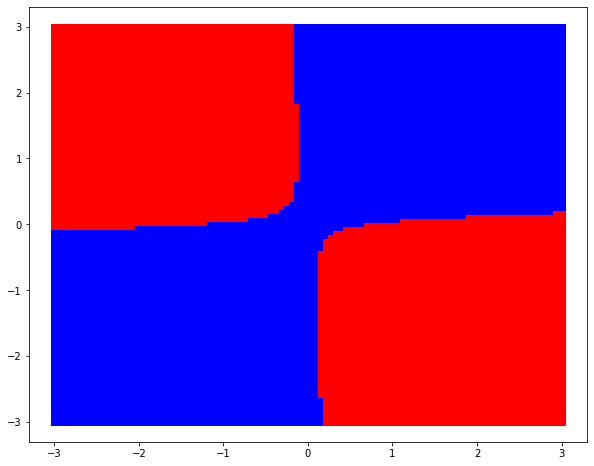

In [ ]:
_ = plt.figure(figsize=(10, 8))
x_region = np.linspace(-3.0, 3.0, 100)
y_region = np.linspace(-3.0, 3.0, 100)
Xgrid,Ygrid = np.meshgrid(x_region, y_region)
F = theta_hat[0] + theta_hat[1]*Xgrid + theta_hat[2]*Ygrid + theta_hat[3]*Xgrid*Ygrid +theta_hat[4]*Xgrid**2 + theta_hat[5]*Ygrid**2

X_pos, Y_pos = Xgrid[F >= 0], Ygrid[F >= 0]
X_neg, Y_neg = Xgrid[F < 0], Ygrid[F < 0]
_ = plt.scatter(X_pos, Y_pos, marker=",",color='blue')
_ = plt.scatter(X_neg, Y_neg, marker=",",color='red')

c) Yes, the polynomial g=x1x2 will classify the generated points with zero error. As it is the function used to generate the y values. That is after applying sign function it will be the same as y.

The parameter of x1x2 in f is 0.72 which is larger than the other parameters in theta. Therefore the least square solution is close to the actual solution that we want. 